In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
sales_data = pd.read_csv("C:\\Users\\DELL\\Basecamp3\\GLabs_Data_Science_Learn\\Big Mart Sales Prediction using Linear Regression\\data\\sales.csv")

In [3]:
sales_data.head(11)

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,source,Outlet_Years,Item_Fat_Content_0,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,train,14,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,train,4,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,train,14,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,train,15,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,Household,0.000000,8.930,1987,train,26,0,...,0,1,0,0,0,0,0,0,0,0
5,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395,2009,train,4,0,...,0,0,0,1,0,0,0,0,0,0
6,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,train,26,0,...,0,1,0,0,0,0,0,0,0,0
7,FDP10,107.7622,4022.7636,Snack Foods,0.127470,19.000,1985,train,28,1,...,0,0,0,0,0,1,0,0,0,0
8,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,train,11,0,...,0,0,0,0,0,0,0,1,0,0
9,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,train,6,0,...,0,0,1,0,0,0,0,0,0,0


In [4]:
sales_data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             int64
Item_Fat_Content_1             int64
Item_Fat_Content_2             int64
Outlet_Location_Type_0         int64
Outlet_Location_Type_1         int64
Outlet_Location_Type_2         int64
Outlet_Size_0                  int64
Outlet_Size_1                  int64
Outlet_Size_2                  int64
Outlet_Type_0                  int64
Outlet_Type_1                  int64
Outlet_Type_2                  int64
Outlet_Type_3                  int64
Item_Type_Combined_0           int64
Item_Type_Combined_1           int64
Item_Type_Combined_2           int64
Outlet_Identifier_0            int64
Outlet_Identifier_1            int64
O

In [5]:
sales_data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,140.992782,2181.288914,0.066132,12.873623,1997.831867,15.168133,0.459697,0.187610,0.352693,0.280183,...,0.065118,0.109351,0.108647,0.108882,0.061950,0.109703,0.109117,0.108999,0.109117,0.109117
std,62.275067,1706.499616,0.051598,4.645893,8.371760,8.371760,0.498402,0.390423,0.477836,0.449115,...,0.246748,0.312098,0.311214,0.311509,0.241079,0.312538,0.311804,0.311656,0.311804,0.311804
min,31.290000,33.290000,0.000000,4.555000,1985.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93.826500,834.247400,0.026989,8.785000,1987.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,143.012800,1794.331000,0.053931,12.600000,1999.000000,14.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,185.643700,3101.296400,0.094585,16.850000,2004.000000,26.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000,28.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 
1. Top 20 outlets wrt sales
2. Top 20 costiest items
3. Age distribution of stores
4. Correlation btw weight and MRP
5. Correlation btw MRP and sales
6. Correlation btw weight and sales
7. Price distribution wrt Fat content 
8. Price distrubition wrt establishment year
9. Sales distrubition wrt establishment year
10. Sales distribution for different location types
11. Correlation btw weight and MRP


13, 14

In [6]:
for outlet in [i for i in sales_data.columns if 'Outlet_Identifier' in i]:
    df = sales_data[sales_data[outlet] ==1]
    print (outlet)
    print (df)
    print('='*50)


Outlet_Identifier_0
     Item_Identifier  Item_MRP  Item_Outlet_Sales              Item_Type  \
3              FDX07  182.0950           732.3800  Fruits and Vegetables   
28             FDE51   45.5086           178.4344                  Dairy   
30             FDV38   55.7956           163.7868                  Dairy   
45             FDM39  178.1002           358.2004                  Dairy   
65             FDC46  185.4266           184.4266            Snack Foods   
...              ...       ...                ...                    ...   
8400           NCE07  140.6154           425.4462              Household   
8432           FDI16   54.3640           159.7920           Frozen Foods   
8473           DRI47  144.3128           431.4384            Hard Drinks   
8486           FDR20   46.4744            45.2744  Fruits and Vegetables   
8509           FDG45  213.9902           424.7804  Fruits and Vegetables   

      Item_Visibility  Item_Weight  Outlet_Establishment_Year sourc

#### 1. Top 20 outlets wrt sales

In [7]:
result = []
for outlet in [i for i in sales_data.columns if 'Outlet_Identifier' in i]:
    df = sales_data[sales_data[outlet] == i]
    result.append({outlet : df['Item_Outlet_Sales'].sum()})
    print (result)

#pd.DataFrame(result).plot(kind='bar')

NameError: name 'i' is not defined

In [ ]:
print ([i for i in sales_data.columns if 'Outlet_Identifier' in i])

In [ ]:
for outlet in [i for i in sales_data.columns if 'Outlet_Identifier' in i]:
    df = sales_data[sales_data[outlet]==1]
    print (df.head)
    print ('='*50)

In [ ]:
for outlet in [i for i in sales_data.columns if 'Outlet_Identifier' in i]:
    df = sales_data[sales_data[outlet]==1]
    result.append({outlet : df['Item_Outlet_Sales'].sum()})
pd.DataFrame(result).plot(kind='bar', legend=False, figsize=(20,5))

## Top 20 costiest items

In [8]:
sales_data.columns

Index(['Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales', 'Item_Type',
       'Item_Visibility', 'Item_Weight', 'Outlet_Establishment_Year', 'source',
       'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Item_Fat_Content_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_0',
       'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_Identifier_0',
       'Outlet_Identifier_1', 'Outlet_Identifier_2', 'Outlet_Identifier_3',
       'Outlet_Identifier_4', 'Outlet_Identifier_5', 'Outlet_Identifier_6',
       'Outlet_Identifier_7', 'Outlet_Identifier_8', 'Outlet_Identifier_9'],
      dtype='object')

In [9]:
sales_data.sort_values('Item_MRP', ascending = False)['Item_MRP'][:20]

4802    266.8884
5884    266.8884
4159    266.6884
5254    266.6884
4538    266.5884
5558    266.5884
4877    266.2884
3714    266.1884
3416    266.1884
8375    266.0226
4195    265.8884
3248    265.7884
3814    265.6884
7085    265.5568
6670    265.2884
5859    265.2884
7951    265.2568
47      265.2226
4144    265.1884
2887    265.1884
Name: Item_MRP, dtype: float64

## 3. Age distribution of stores


In [10]:
sales_data.columns

Index(['Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales', 'Item_Type',
       'Item_Visibility', 'Item_Weight', 'Outlet_Establishment_Year', 'source',
       'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Item_Fat_Content_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_0',
       'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_Identifier_0',
       'Outlet_Identifier_1', 'Outlet_Identifier_2', 'Outlet_Identifier_3',
       'Outlet_Identifier_4', 'Outlet_Identifier_5', 'Outlet_Identifier_6',
       'Outlet_Identifier_7', 'Outlet_Identifier_8', 'Outlet_Identifier_9'],
      dtype='object')

In [11]:
sales_data['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

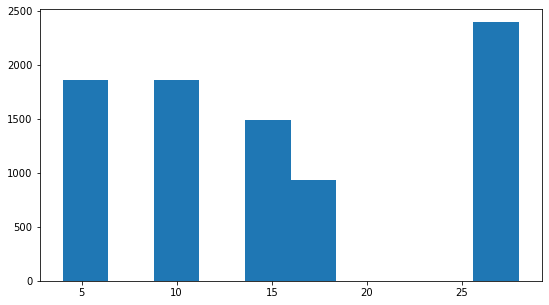

In [12]:
fig = plt.figure(figsize=(9,5))
plt.hist(sales_data['Outlet_Years'])
plt.show()

## Correlation between weight and MRP

In [13]:
sales_data.columns

Index(['Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales', 'Item_Type',
       'Item_Visibility', 'Item_Weight', 'Outlet_Establishment_Year', 'source',
       'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Item_Fat_Content_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_0',
       'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_Identifier_0',
       'Outlet_Identifier_1', 'Outlet_Identifier_2', 'Outlet_Identifier_3',
       'Outlet_Identifier_4', 'Outlet_Identifier_5', 'Outlet_Identifier_6',
       'Outlet_Identifier_7', 'Outlet_Identifier_8', 'Outlet_Identifier_9'],
      dtype='object')

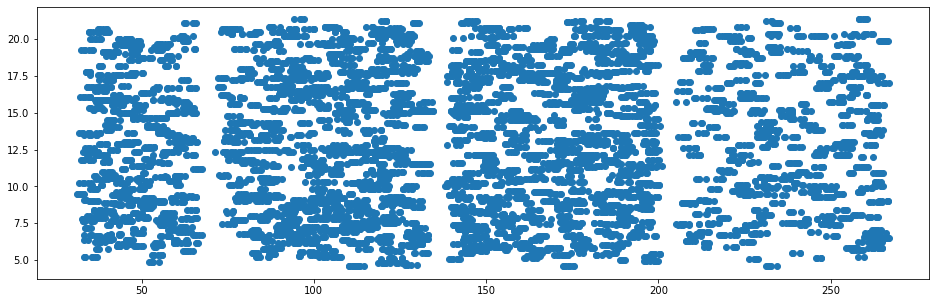

In [14]:
fig = plt.figure(figsize = (16,5))

plt.scatter(sales_data['Item_MRP'], sales_data['Item_Weight'])

## Correlation between MRP & Sales



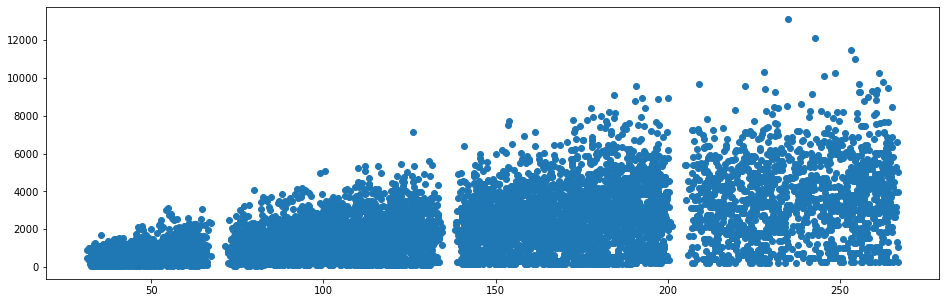

In [15]:
fig = plt.figure(figsize = (16,5))

plt.scatter(sales_data['Item_MRP'], sales_data['Item_Outlet_Sales'])

In [16]:
sales_data['Item_Sales_Qty'] = sales_data['Item_Outlet_Sales']/sales_data['Item_MRP']

In [17]:
sales_data.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,source,Outlet_Years,Item_Fat_Content_0,...,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9,Item_Sales_Qty
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,train,14,1,...,0,0,0,0,0,0,0,0,1,14.951963
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,train,4,0,...,0,0,1,0,0,0,0,0,0,9.186454
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,train,14,1,...,0,0,0,0,0,0,0,0,1,14.809346
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,train,15,0,...,0,0,0,0,0,0,0,0,0,4.021967
4,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,train,26,0,...,1,0,0,0,0,0,0,0,0,18.467868


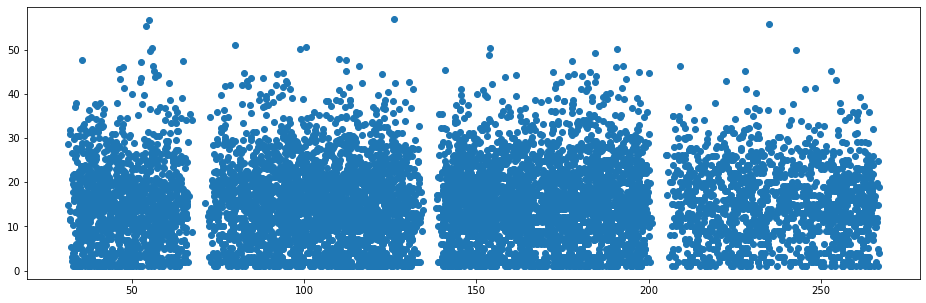

In [18]:
fig = plt.figure(figsize = (16,5))

plt.scatter(sales_data['Item_MRP'], sales_data['Item_Sales_Qty'])

## Price distribution wrt fAT category

In [19]:
sales_data.columns

Index(['Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales', 'Item_Type',
       'Item_Visibility', 'Item_Weight', 'Outlet_Establishment_Year', 'source',
       'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Item_Fat_Content_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_0',
       'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_Identifier_0',
       'Outlet_Identifier_1', 'Outlet_Identifier_2', 'Outlet_Identifier_3',
       'Outlet_Identifier_4', 'Outlet_Identifier_5', 'Outlet_Identifier_6',
       'Outlet_Identifier_7', 'Outlet_Identifier_8', 'Outlet_Identifier_9',
       'Item_Sales_Qty'],
      dtype='object')

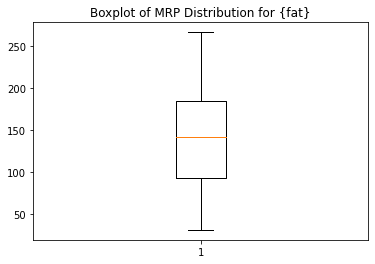

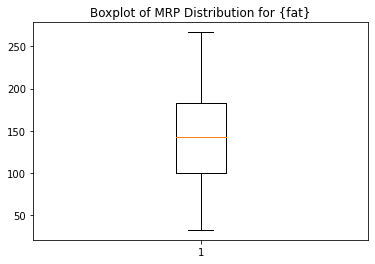

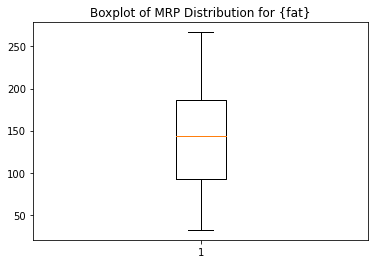

In [20]:
for fat in [i for i in sales_data.columns if 'Item_Fat_Content' in i]:
    df = sales_data[sales_data[fat]==1]
    plt.boxplot(df['Item_MRP'])
    plt.title("Boxplot of MRP Distribution for {fat}")
    plt.show()

## Sales distribution wrt established year

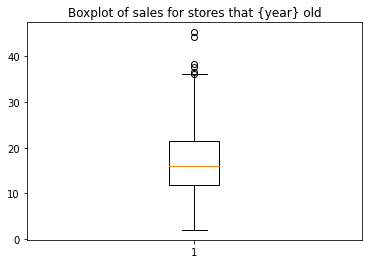

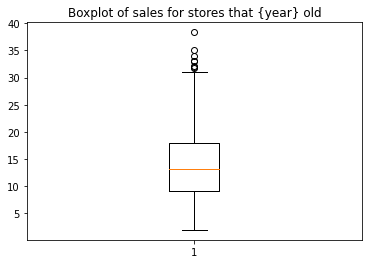

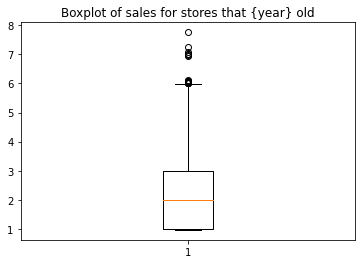

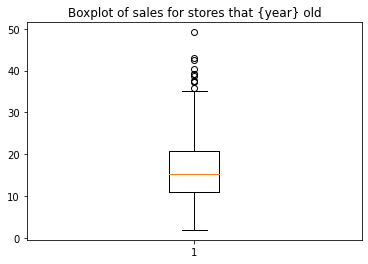

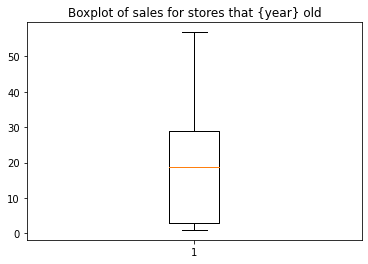

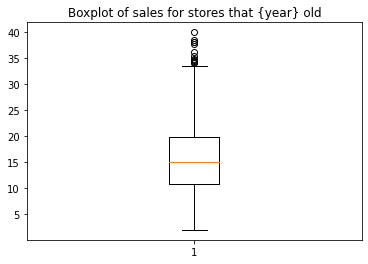

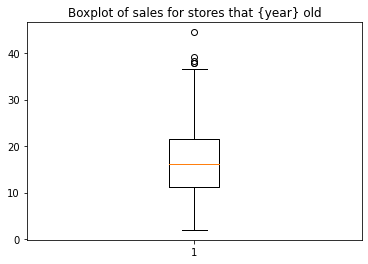

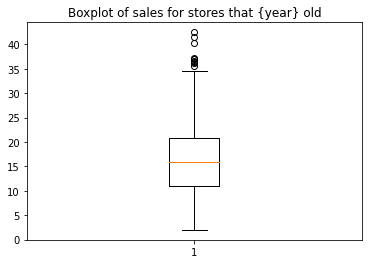

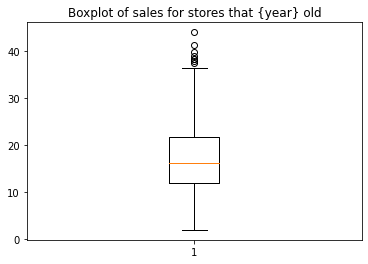

In [21]:
for year in sales_data['Outlet_Years'].unique():
    df = sales_data[sales_data['Outlet_Years'] == year]
    plt.boxplot(df['Item_Sales_Qty'])
    plt.title("Boxplot of sales for stores that {year} old")
    plt.show()

#### Deleted the code, it slows down the system

In [23]:
sales_data[sales_data['Outlet_Years']==15]

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,source,Outlet_Years,Item_Fat_Content_0,...,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9,Item_Sales_Qty
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,train,15,0,...,0,0,0,0,0,0,0,0,0,4.021967
28,FDE51,45.5086,178.4344,Dairy,0.161467,5.925,1998,train,15,0,...,0,0,0,0,0,0,0,0,0,3.920894
30,FDV38,55.7956,163.7868,Dairy,0.170349,19.250,1998,train,15,1,...,0,0,0,0,0,0,0,0,0,2.935479
45,FDM39,178.1002,358.2004,Dairy,0.089499,6.420,1998,train,15,1,...,0,0,0,0,0,0,0,0,0,2.011230
65,FDC46,185.4266,184.4266,Snack Foods,0.195068,17.700,1998,train,15,1,...,0,0,0,0,0,0,0,0,0,0.994607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8400,NCE07,140.6154,425.4462,Household,0.021977,8.180,1998,train,15,0,...,0,0,0,0,0,0,0,0,0,3.025602
8432,FDI16,54.3640,159.7920,Frozen Foods,0.227261,14.000,1998,train,15,0,...,0,0,0,0,0,0,0,0,0,2.939298
8473,DRI47,144.3128,431.4384,Hard Drinks,0.035016,14.700,1998,train,15,1,...,0,0,0,0,0,0,0,0,0,2.989606
8486,FDR20,46.4744,45.2744,Fruits and Vegetables,0.000000,20.000,1998,train,15,0,...,0,0,0,0,0,0,0,0,0,0.974179


In [28]:
sales_data.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,source,Outlet_Years,Item_Fat_Content_0,...,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9,Item_Sales_Qty
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,train,14,1,...,0,0,0,0,0,0,0,0,1,14.951963
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,train,4,0,...,0,0,1,0,0,0,0,0,0,9.186454
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,train,14,1,...,0,0,0,0,0,0,0,0,1,14.809346
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,train,15,0,...,0,0,0,0,0,0,0,0,0,4.021967
4,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,train,26,0,...,1,0,0,0,0,0,0,0,0,18.467868


In [30]:
sales_data['Outlet_Size_0']

0       0
1       0
2       0
3       0
4       1
       ..
8518    1
8519    0
8520    0
8521    0
8522    0
Name: Outlet_Size_0, Length: 8523, dtype: int64

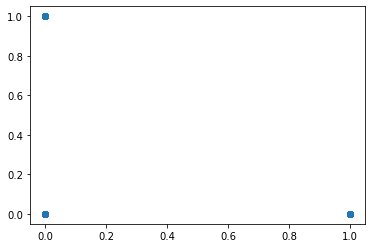

In [31]:
plt.scatter (sales_data['Outlet_Identifier_1'], sales_data['Outlet_Size_1'])

In [39]:
ml_data = sales_data.drop(['Item_Identifier', 'Outlet_Establishment_Year'], axis = 1)

In [40]:
ml_ohe_data = pd.get_dummies(ml_data, columns = ['Item_Type'])

In [41]:
X = ml_ohe_data.drop('Item_Outlet_Sales', axis = 1)
y = ml_ohe_data.drop['Item_Outlet_Sales']

TypeError: 'method' object is not subscriptable